In [1]:
!pip install opencv-python scikit-learn numpy matplotlib joblib

In [10]:
import cv2
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
import matplotlib.pyplot as plt
import joblib
import os

In [11]:
def load_and_preprocess_images(image_paths, labels):
    X = []
    processed_labels = [] # Create a list to store labels for successfully loaded images
    for i, path in enumerate(image_paths): # Iterate with index to get corresponding label
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load {path}") # Corrected print statement
            continue  # Skip to the next image if loading fails

        img = cv2.resize(img, (64, 64))  # Resize to 64x64
        X.append(img.flatten())  # Flatten image into 1D array
        processed_labels.append(labels[i]) # Append the label for the successfully loaded image

    return np.array(X), np.array(processed_labels) # Return outside the loop


In [12]:
directory_path = "/content/road_accident"
image_paths = []
labels = [] # Initialize labels list outside the loop
for filename in os.listdir(directory_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        full_path = os.path.join(directory_path, filename)
        image_paths.append(full_path)
        labels.append("accident") # Append label for each image

X_train, y_train = load_and_preprocess_images(image_paths, labels)
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}") # Corrected print statement


Training data shape: (347, 4096), Labels shape: (347,)


In [13]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


In [14]:
def predict_emergency_type(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return "unknown"
    img = cv2.resize(img, (64, 64))
    features = img.flatten().reshape(1, -1)
    prediction = dt_classifier.predict(features)[0]
    return prediction

In [15]:
def get_emergency_distribution(alerts):
    types = [a.get('emergency_type', 'unknown') for a in alerts]
    return Counter(types)

In [16]:
alerts = []
for path in image_paths:
    emergency_type = predict_emergency_type(path)
    alerts.append({'emergency_type': emergency_type})

In [17]:
distribution = get_emergency_distribution(alerts)
print("Emergency Type Distribution:", distribution)

Emergency Type Distribution: Counter({np.str_('accident'): 347})


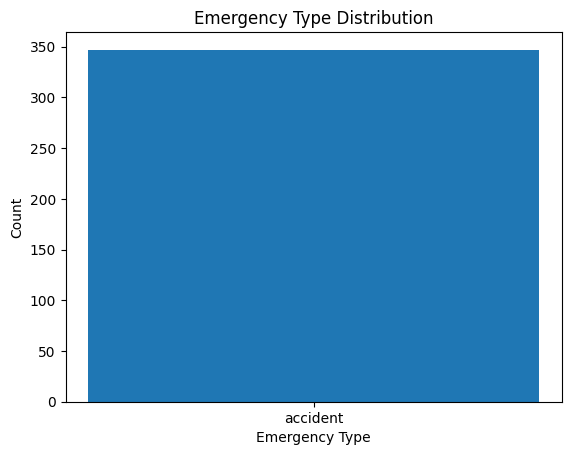

In [18]:
%matplotlib inline
plt.bar(distribution.keys(), distribution.values())
plt.title("Emergency Type Distribution")
plt.xlabel("Emergency Type")
plt.ylabel("Count")
plt.show()

In [19]:
joblib.dump(dt_classifier, 'decision_tree_model.pkl')
print("Model saved as decision_tree_model.pkl")

Model saved as decision_tree_model.pkl
